In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
mp=pd.read_csv("../input/mobile-price-classification/train.csv")
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
mp.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Analysis

In [4]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mp.shape

(2000, 21)

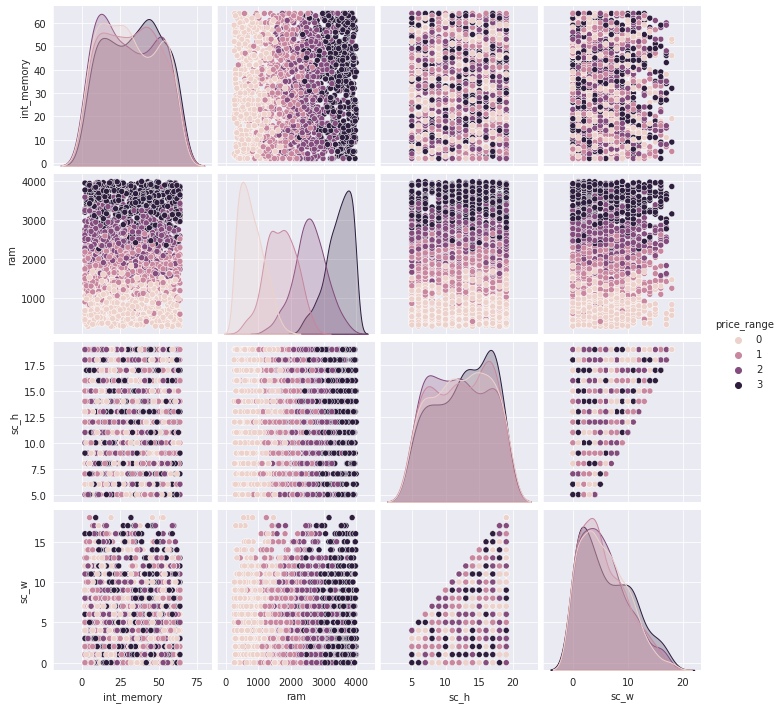

In [6]:
sns.set_style('darkgrid')
sns.pairplot(mp,hue='price_range',vars=['int_memory','ram','sc_h','sc_w'])

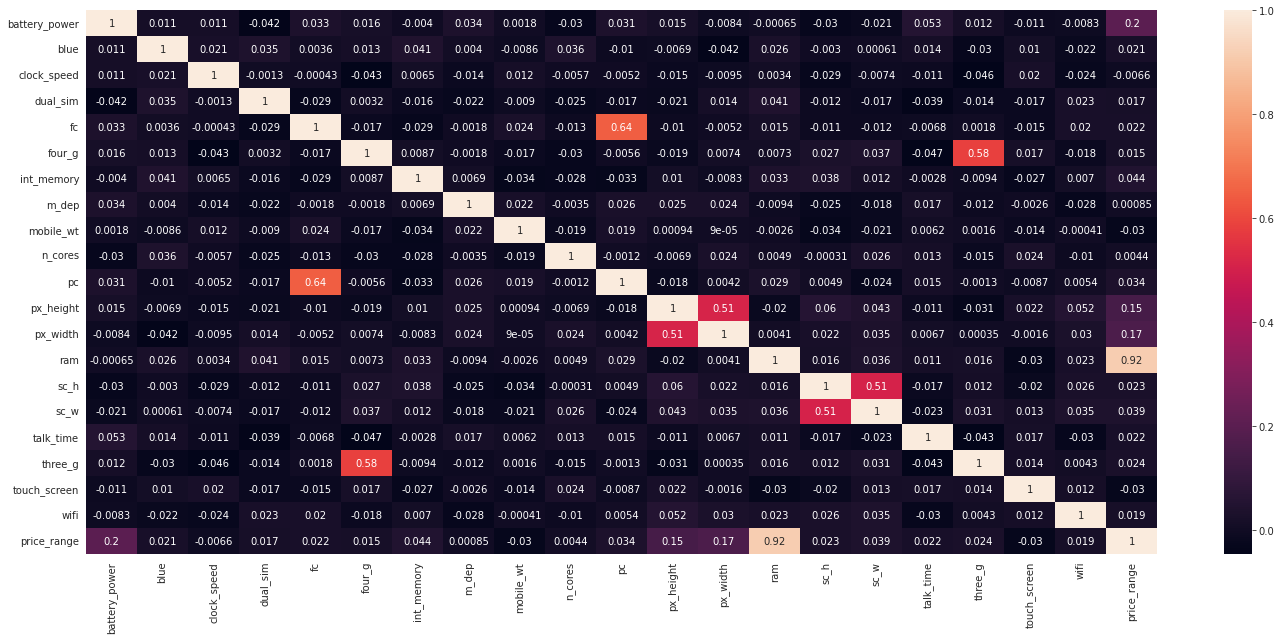

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 10))

corrMatrix=mp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


### Ram and Price correlation

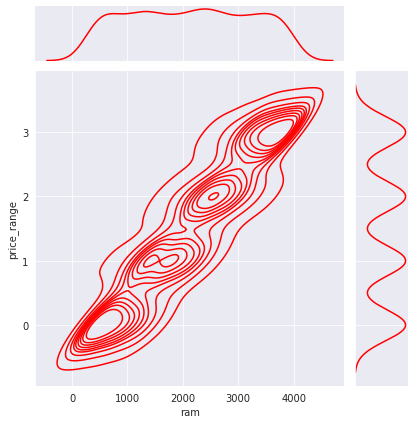

In [8]:
%matplotlib inline
#Kde plot - kernel density estimation =A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable (see more). It is a smoothed version of the histogram and is used in the same concept.
sns.jointplot(x='ram',y='price_range',data=mp,color='red',kind='kde');

### Internal memory relation with price

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

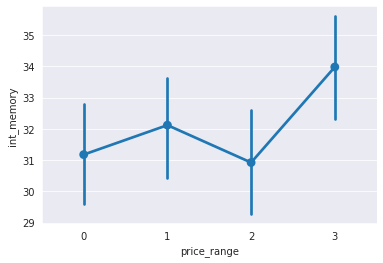

In [9]:
sns.pointplot(y='int_memory',x='price_range',data=mp)

### % of phones which support 3G

Values [1523  477]


<Figure size 1728x720 with 0 Axes>

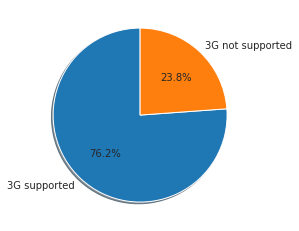

In [10]:
label_3G=["3G supported","3G not supported"]
values=mp['three_g'].value_counts().values

print('Values',values)

plt.figure(figsize=(24, 10))

fig1 , ax1=plt.subplots()
ax1.pie(values,labels=label_3G,shadow=True,autopct='%1.1f%%',startangle=90)
plt.show()


### Batter power vs Price 

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

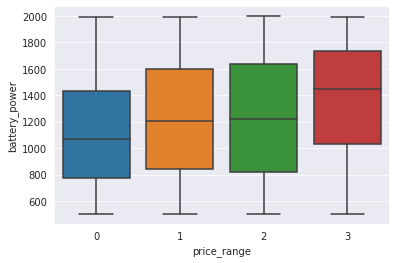

In [11]:
sns.boxplot(x="price_range",y="battery_power",data=mp)

### Mobile Weight vs Price 

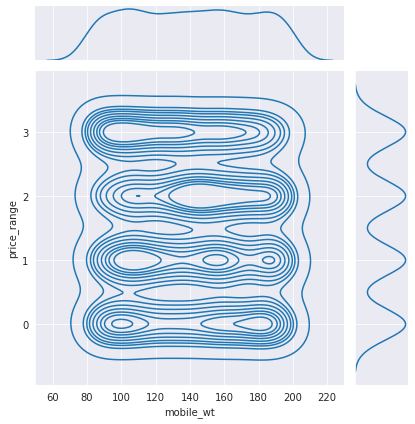

In [12]:
sns.jointplot(x='mobile_wt',y='price_range',data=mp,kind='kde')

### Number of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

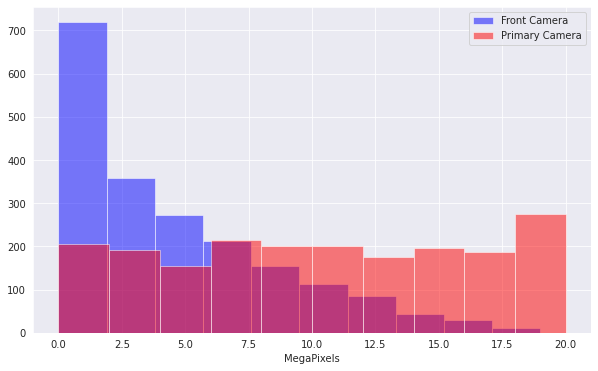

In [13]:
plt.figure(figsize=(10,6))
mp['fc'].hist(alpha=0.5,color='blue',label='Front Camera')
mp['pc'].hist(alpha=0.5,color='red',label='Primary Camera')
plt.legend()
plt.xlabel('MegaPixels')

In [14]:
X=mp.drop('price_range',axis=1)
print(X)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [15]:
y=mp['price_range']
print(y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.9132801488185277

### KNN Algorithm

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
knn.score(X_test,y_test)

0.9212121212121213

In [21]:
#Elbow Method for determing optimum value of K 

error_rate=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
print(pred_i)

[1 1 2 1 0 1 2 1 1 1 0 1 1 1 1 0 1 2 1 1 3 0 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 3 2 3 0 1 3 3 1 0 0 2 3 3 2 0 3 2 3 2 2 3 1 3 1 0 0 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 1 2 2 2 1 0 0 3 2 0 2 0 3 2 0 2 3 0 1 2 3 0 2 0 0 2 0 1
 0 3 2 2 1 1 3 1 0 3 3 2 3 1 2 3 2 1 1 1 0 0 1 0 2 3 0 2 3 1 3 0 0 0 1 1 2
 2 0 3 1 3 2 3 2 2 0 3 1 2 2 2 2 1 2 1 1 3 3 1 2 0 3 1 3 2 2 3 1 2 1 0 1 2
 2 1 2 0 3 1 0 2 3 0 2 0 0 3 0 0 1 3 2 1 3 0 2 2 2 1 1 1 3 1 3 0 0 3 1 1 2
 3 0 2 3 3 0 3 1 1 1 0 2 1 2 1 2 2 0 1 2 1 2 0 3 3 2 3 3 1 3 1 1 3 1 0 2 0
 1 1 3 3 0 1 0 1 1 0 2 3 1 3 2 1 2 1 2 0 3 2 3 1 2 3 2 2 1 3 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 3 1 2 1 1 2 0 0 0 1 1 3 1 2 2 1 3 1 3 0 1 2 0 0 2 2 2 2
 1 0 0 2 2 1 1 2 1 2 0 0 1 0 2 3 3 2 2 2 2 0 3 2 0 0 2 0 3 3 1 0 1 0 2 0 0
 1 0 0 2 1 2 1 3 2 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 1 3 2 0 3 3 2 0 3 2 2 1
 3 1 2 1 2 1 2 2 0 2 0 1 3 1 1 2 1 1 1 3 0 3 1 3 2 3 2 3 2 3 1 1 3 0 0 2 2
 0 0 1 2 0 3 0 3 0 2 0 0 2 2 3 1 0 1 2 2 0 3 2 3 2 3 0 3 2 3 1 2 3 3 2 3 1
 2 0 2 2 1 3 2 1 1 3 3 0 

Text(0, 0.5, 'Error Rate')

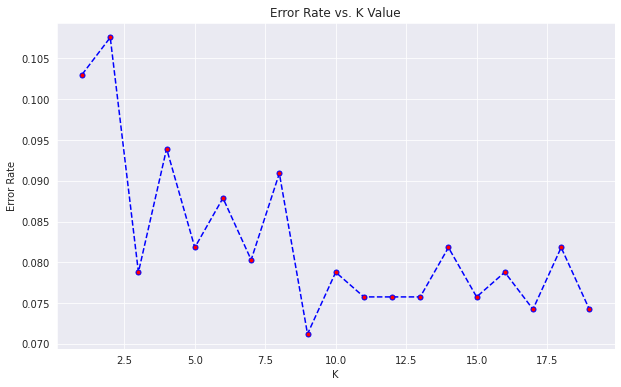

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)
logmodel.score(X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6181818181818182

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.8121212121212121

In [26]:
feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [27]:
#For tree Visualization as kaggle does't support pydotplus just install the pydotplus in your systems's conda terminal
'''
import pydotplus as pydot

from IPython.display import Image

from sklearn.externals.six import StringIO

dot_data = StringIO()

tree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())'''

'\nimport pydotplus as pydot\n\nfrom IPython.display import Image\n\nfrom sklearn.externals.six import StringIO\n\ndot_data = StringIO()\n\ntree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)\n\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())\n\nImage(graph.create_png())'

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)


In [29]:
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8712121212121212

### Price prediction of test.csv using KNN for prediction

In [30]:
mp_test=pd.read_csv("../input/mobile-price-classification/test.csv")
mp_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [31]:
mp_test=mp_test.drop('id',axis=1)
mp_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [32]:
predicted_price=knn.predict(mp_test)

In [33]:
mp_test['price_range']=predicted_price

In [34]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [35]:
mp_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
